# PSTAT 234 Homework 2 
__Author: Laura Urbisci__  
__Due date: April 25, 2018 by 10 pm__


## Problem 1: Data download

I took the default option and used the `get_nba_data()` function.

In [1]:
import pandas as pd

def get_nba_data(endpt, params, return_url=False):

    ## endpt: https://github.com/seemethere/nba_py/wiki/stats.nba.com-Endpoint-Documentation
    ## params: dictionary of parameters: i.e., {'LeagueID':'00'}
    
    from pandas import DataFrame
    from urllib.parse import urlencode
    import json
    
    useragent = "\"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9\""
    dataurl = "\"" + "http://stats.nba.com/stats/" + endpt + "?" + urlencode(params) + "\""
    
    # for debugging: just return the url
    if return_url:
        return(dataurl)
    
    jsonstr = !wget -q -O - --user-agent={useragent} {dataurl}
    
    data = json.loads(jsonstr[0])
    
    h = data['resultSets'][0]['headers']
    d = data['resultSets'][0]['rowSet']
    
    return(DataFrame(d, columns=h))

In [2]:
## get all teams
params = {'LeagueID':'00'}
teams = get_nba_data('commonTeamYears', params)

## get all players
params = {'LeagueID':'00', 'Season': '2016-17', 'IsOnlyCurrentSeason': '0'}
players = get_nba_data('commonallplayers', params)

teams.ABBREVIATION = teams.ABBREVIATION.astype('category')
teams.TEAM_ID      = teams.TEAM_ID.astype('category')
teams.MIN_YEAR     = teams.MIN_YEAR.astype('int')
teams.MAX_YEAR     = teams.MAX_YEAR.astype('int')

teams = teams[teams.MAX_YEAR == 2017]
teams['TEAM_AGE'] = teams.MAX_YEAR - teams.MIN_YEAR

teams_clean = teams.copy() ## make a copy for later
team_names = players[['TEAM_ABBREVIATION', 'TEAM_CODE']].drop_duplicates()#.set_index('TEAM_ABBREVIATION')
teams = pd.merge(teams_clean, team_names, left_on='ABBREVIATION', right_on='TEAM_ABBREVIATION')
teams.TEAM_CODE = teams.TEAM_CODE.str.capitalize() # returns values so needs to be reassigned
teams.sort_values('ABBREVIATION', inplace=True)    # modifies object

teams.tail()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,TEAM_AGE,TEAM_ABBREVIATION,TEAM_CODE
21,00,1610612758,1948,2017,SAC,69,SAC,Kings
22,00,1610612759,1976,2017,SAS,41,SAS,Spurs
24,00,1610612761,1995,2017,TOR,22,TOR,Raptors
25,00,1610612762,1974,2017,UTA,43,UTA,Jazz
27,00,1610612764,1961,2017,WAS,56,WAS,Wizards


In [3]:
players.head()

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG
0,76001,"Abdelnaby, Alaa",Alaa Abdelnaby,0,1990,1994,HISTADD_alaa_abdelnaby,0,,,,,Y
1,76002,"Abdul-Aziz, Zaid",Zaid Abdul-Aziz,0,1968,1977,HISTADD_zaid_abdul-aziz,0,,,,,Y
2,76003,"Abdul-Jabbar, Kareem",Kareem Abdul-Jabbar,0,1969,1988,HISTADD_kareem_abdul-jabbar,0,,,,,Y
3,51,"Abdul-Rauf, Mahmoud",Mahmoud Abdul-Rauf,0,1990,2000,mahmoud_abdul-rauf,0,,,,,Y
4,1505,"Abdul-Wahad, Tariq",Tariq Abdul-Wahad,0,1997,2003,tariq_abdul-wahad,0,,,,,Y


## Problem 2 and 3: Creating interactive widgets and downloading data with changing widget states

In this section I have a total of three widegets. The first widget is from lecture that gives dropdown windows for all of the basketball teams and for the corresponding basketball players. The second widget is a slider that shows the ranges of the ages for all of the teams. The third and final widget has a dropdown window with the potential basketball teams and an icon that says "This team you chose is the: ..." when you click it.

In [4]:
import ipywidgets as widgets

# Widget from lecture - Teams and players
team_dd_text = teams.TEAM_ABBREVIATION+', '+teams.TEAM_CODE
team_dd = dict(zip(team_dd_text, teams.TEAM_ID))

plyr_by_team_dd = dict()

for t, p in players.groupby('TEAM_ID'):
    plyr_by_team_dd[t] = dict(zip(p.DISPLAY_LAST_COMMA_FIRST, p.PERSON_ID))

plyr_dd_text = players.DISPLAY_LAST_COMMA_FIRST
plyr_dd_id = players.PERSON_ID
plyr_dd = dict(zip(plyr_dd_text, plyr_dd_id))

selected = 'LAC, Clippers'

team_menu = widgets.Dropdown(options=team_dd, label=selected)
plyr_menu = widgets.Dropdown(options=plyr_by_team_dd[team_dd[selected]])

display(team_menu, plyr_menu)

def update_team(change):
    plyr_menu.options = plyr_by_team_dd[change['new']]

team_menu.observe(update_team, names='value')

Dropdown(index=12, options={'ATL, Hawks': 1610612737, 'BKN, Nets': 1610612751, 'BOS, Celtics': 1610612738, 'CHA, Hornets': 1610612766, 'CHI, Bulls': 1610612741, 'CLE, Cavaliers': 1610612739, 'DAL, Mavericks': 1610612742, 'DEN, Nuggets': 1610612743, 'DET, Pistons': 1610612765, 'GSW, Warriors': 1610612744, 'HOU, Rockets': 1610612745, 'IND, Pacers': 1610612754, 'LAC, Clippers': 1610612746, 'LAL, Lakers': 1610612747, 'MEM, Grizzlies': 1610612763, 'MIA, Heat': 1610612748, 'MIL, Bucks': 1610612749, 'MIN, Timberwolves': 1610612750, 'NOP, Pelicans': 1610612740, 'NYK, Knicks': 1610612752, 'OKC, Thunder': 1610612760, 'ORL, Magic': 1610612753, 'PHI, Sixers': 1610612755, 'PHX, Suns': 1610612756, 'POR, Blazers': 1610612757, 'SAC, Kings': 1610612758, 'SAS, Spurs': 1610612759, 'TOR, Raptors': 1610612761, 'UTA, Jazz': 1610612762, 'WAS, Wizards': 1610612764}, value=1610612746)

Dropdown(options={'Anderson, Alan': 101187, 'Bass, Brandon': 101138, 'Crawford, Jamal': 2037, 'Felton, Raymond': 101109, 'Griffin, Blake': 201933, 'Johnson, Brice': 1627744, 'Johnson, Wesley': 202325, 'Jordan, DeAndre': 201599, 'Mbah a Moute, Luc': 201601, 'Paul, Chris': 101108, 'Pierce, Paul': 1718, 'Redick, JJ': 200755, 'Rivers, Austin': 203085, 'Speights, Marreese': 201578, 'Stone, Diamond': 1627754}, value=101187)

In [5]:
# Widget slider for the range of TEAM_AGE
age_min = teams.TEAM_AGE.min()
age_max = teams.TEAM_AGE.max()
style = {'description_width': 'initial'}

widgets.IntSlider(min=age_min, max=age_max, description="Possible team age values:", style=style)


IntSlider(value=15, description='Possible team age values:', max=71, min=15, style=SliderStyle(description_width='initial'))

In [6]:
# Creating a changing widget for the teams
selected = 'LAC, Clippers'

team_menu = widgets.Dropdown(options=team_dd, label=selected)
pick = widgets.Button(description='Pick!')

def pick_team(change):
    print("The team you chose is the:", team_menu.label)
    
pick.on_click(pick_team)

display(team_menu, pick)

Dropdown(index=12, options={'ATL, Hawks': 1610612737, 'BKN, Nets': 1610612751, 'BOS, Celtics': 1610612738, 'CHA, Hornets': 1610612766, 'CHI, Bulls': 1610612741, 'CLE, Cavaliers': 1610612739, 'DAL, Mavericks': 1610612742, 'DEN, Nuggets': 1610612743, 'DET, Pistons': 1610612765, 'GSW, Warriors': 1610612744, 'HOU, Rockets': 1610612745, 'IND, Pacers': 1610612754, 'LAC, Clippers': 1610612746, 'LAL, Lakers': 1610612747, 'MEM, Grizzlies': 1610612763, 'MIA, Heat': 1610612748, 'MIL, Bucks': 1610612749, 'MIN, Timberwolves': 1610612750, 'NOP, Pelicans': 1610612740, 'NYK, Knicks': 1610612752, 'OKC, Thunder': 1610612760, 'ORL, Magic': 1610612753, 'PHI, Sixers': 1610612755, 'PHX, Suns': 1610612756, 'POR, Blazers': 1610612757, 'SAC, Kings': 1610612758, 'SAS, Spurs': 1610612759, 'TOR, Raptors': 1610612761, 'UTA, Jazz': 1610612762, 'WAS, Wizards': 1610612764}, value=1610612746)

Button(description='Pick!', style=ButtonStyle())

## Problem 4: Data transformation and visualization

I created two data transformations using split-apply-combine approach taking player data on Stephen Curry where I looked at:

1) the average shots made by shot zone area  
2) and the average shots made by minutes remanining. 

I visualized both of these plots with point plots which shows the estimated value and confidence interval.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

params = {'PlayerID':'201939',
          'PlayerPosition':'',
          'Season':'2016-17',
          'ContextMeasure':'FGA',
          'DateFrom':'',
          'DateTo':'',
          'GameID':'',
          'GameSegment':'',
          'LastNGames':'0',
          'LeagueID':'00',
          'Location':'',
          'Month':'0',
          'OpponentTeamID':'0',
          'Outcome':'',
          'Period':'0',
          'Position':'',
          'RookieYear':'',
          'SeasonSegment':'',
          'SeasonType':'Regular Season',
          'TeamID':'0',
          'VsConference':'',
          'VsDivision':''}

shotdata = get_nba_data('shotchartdetail', params)
shotdata.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021600003,19,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,2,...,Right Side Center(RC),24+ ft.,28,130,257,1,0,20161025,GSW,SAS
1,Shot Chart Detail,0021600003,28,201939,Stephen Curry,1610612744,Golden State Warriors,1,8,6,...,Right Side Center(RC),24+ ft.,25,189,174,1,1,20161025,GSW,SAS
2,Shot Chart Detail,0021600003,88,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,23,...,Right Side Center(RC),24+ ft.,27,159,229,1,0,20161025,GSW,SAS
3,Shot Chart Detail,0021600003,91,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,1,...,Right Side Center(RC),16-24 ft.,21,163,141,1,0,20161025,GSW,SAS
4,Shot Chart Detail,0021600003,184,201939,Stephen Curry,1610612744,Golden State Warriors,2,6,47,...,Center(C),24+ ft.,26,-9,267,1,1,20161025,GSW,SAS


In [8]:
shotdata.describe()

,GAME_EVENT_ID,PLAYER_ID,TEAM_ID,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
count,1442.000000,1442.0,1.442000e+03,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.0,1442.000000
mean,255.094313,201939.0,1.610613e+09,2.309986,4.162275,28.370319,17.878641,-3.277393,134.963245,1.0,0.467406
std,158.961287,0.0,0.000000e+00,1.090122,3.236891,17.866461,11.368833,125.643645,112.612498,0.0,0.499110
min,2.000000,201939.0,1.610613e+09,1.000000,0.000000,0.000000,0.000000,-246.000000,-36.000000,1.0,0.000000
25%,101.000000,201939.0,1.610613e+09,1.000000,1.000000,13.000000,5.000000,-93.750000,18.000000,1.0,0.000000
50%,263.000000,201939.0,1.610613e+09,2.000000,4.000000,28.000000,23.000000,1.000000,146.000000,1.0,0.000000
75%,368.000000,201939.0,1.610613e+09,3.000000,7.000000,44.000000,25.000000,89.000000,228.000000,1.0,1.000000
max,641.000000,201939.0,1.610613e+09,6.000000,11.000000,59.000000,71.000000,245.000000,717.000000,1.0,1.000000


In [9]:
shotdata.groupby('SHOT_ZONE_AREA')['SHOT_MADE_FLAG'].mean()

SHOT_ZONE_AREA
Back Court(BC)           0.050000
Center(C)                0.509231
Left Side Center(LC)     0.486792
Left Side(L)             0.474576
Right Side Center(RC)    0.396610
Right Side(R)            0.425532
Name: SHOT_MADE_FLAG, dtype: float64

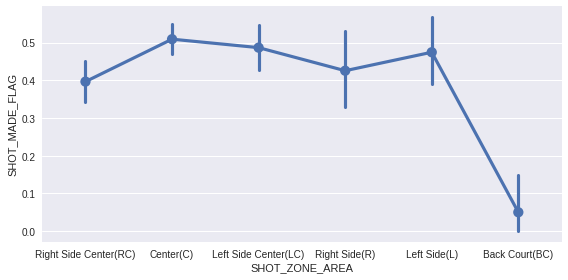

In [10]:
sns.factorplot(x="SHOT_ZONE_AREA", y="SHOT_MADE_FLAG", data=shotdata, size=4, aspect=2)

In [11]:
shotdata.groupby('MINUTES_REMAINING')['SHOT_MADE_FLAG'].mean()

MINUTES_REMAINING
0     0.382775
1     0.505814
2     0.410256
3     0.592593
4     0.397436
5     0.442623
6     0.474747
7     0.535714
8     0.494253
9     0.567901
10    0.460317
11    0.411765
Name: SHOT_MADE_FLAG, dtype: float64

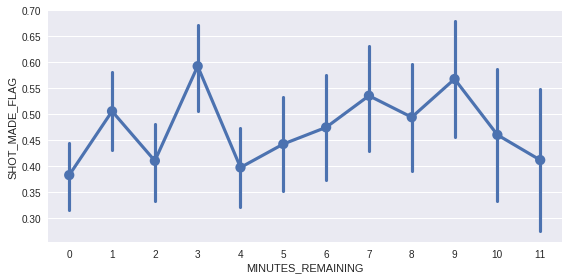

In [12]:
sns.factorplot(x="MINUTES_REMAINING", y="SHOT_MADE_FLAG", 
               data=shotdata, size=4, aspect=2)